## Cwiczenie 1 (3 pkt) - Kernelized Linear Regression

Dane pochodzą z rozkładu y_i = m*x_i + b + N(0, 1). 

Na podstawie 101 przykładów z rozkładu policz estymator MLE następującego modelu:

a) $$ p(y | x) = N(<x, w> + b, \sigma^2) = <x, w> + b + N(0, \sigma^2) $$. Równoważne $\phi(x) = [1, x]$ (patrz podpunkt b)

b) $$ p(y | x) = N(<\phi(x), w>, \sigma^2) = <\phi(x), w> + N(0, \sigma^2) $$, gdzie $\phi(x) = [1, x, x^2, x^3, x^4]$

Kod powinien być opakowany w klase ToyLinearRegression z metodami fit oraz predict. ToyLinearRegression powinien przyjmować w konstruktorze funkcję phi, która zamienia x na jego cechy, np phi(x) = [x] oznacza liniowy model.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [4]:
def phi_1(x):
    return [1, x]

def phi_2(x):
    return [1, x, x**2, x**3, x**4]

In [5]:
class ToLinearRegression:
    
    def __init__(self, phi):
        self.phi = phi
        self.theta = None
    
    def fit(self, X, Y):
        X = np.array([self.phi(x) for x in domain])
        self.theta = np.linalg.inv((X.transpose().dot(X))).dot(X.transpose()).dot(Y)
        return self
    
    def predict(self, X):
        X = np.array([self.phi(x) for x in domain])
        return self.theta.transpose().dot(X.transpose())


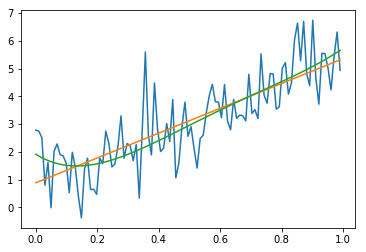

In [10]:
## Syntetyczny zbiór danych z dużym szumem ale liniowymi danymi
np.random.seed(123456789)

def y(x,m,b,mu=0,sigma=1.0): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)

for i in range(N): 
    domain[i] = i*domain_bound

for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)

plt.plot(domain, t)
    
tlr = ToLinearRegression(phi_1)
tlr.fit(domain, t)
plt.plot(domain, tlr.predict(domain))

tlr = ToLinearRegression(phi_2)
tlr.fit(domain, t)
plt.plot(domain, tlr.predict(domain))



In [12]:
w_pred = ToLinearRegression(phi=lambda x: [1, x]).fit(domain, t).theta
assert np.abs(w_pred - np.array([0.88610652, 4.47519348])).max() < 0.05

AttributeError: 'NoneType' object has no attribute 'theta'